In [91]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv
/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTest.csv


In [92]:
# Carrega dados
url = '/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv'
data = pd.read_csv(url, sep=',')
data.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


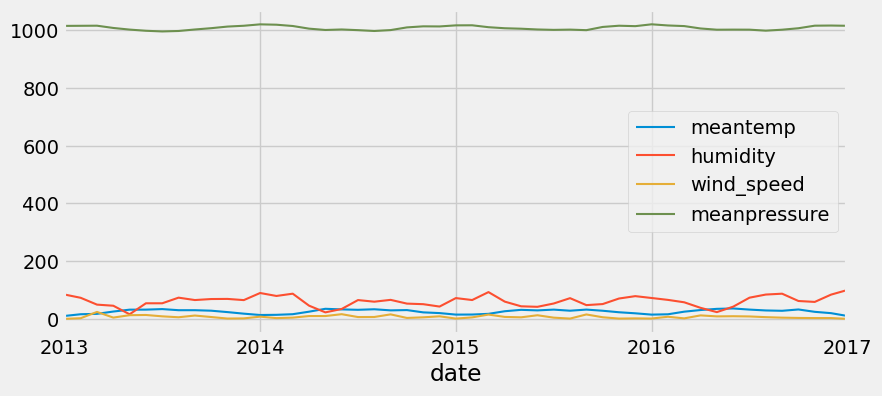

In [93]:
# Tratamento de dados
# Converte data de string para datetime e transforma em índice
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
# Seto o índice
data = data.set_index('date')
# Defino a frequência (Mensal). Caso falte registro, cria um novo e preenche as demais colunas com 0.0
data = data.asfreq('MS', fill_value=0.0)
# Ordena pela data
data = data.sort_index()

# Plota os dados
fig, ax = plt.subplots(figsize=(9, 4))
data['meantemp'].plot(ax=ax, label='meantemp')
data['humidity'].plot(ax=ax, label='humidity')
data['wind_speed'].plot(ax=ax, label='wind_speed')
data['meanpressure'].plot(ax=ax, label='meanpressure')
ax.legend();

In [94]:
print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


In [95]:
# Código para verificar se não existem "buracos" nos dados
(data.index == pd.date_range(start=data.index.min(),
                             end=data.index.max(),
                             freq=data.index.freq)).all()

True

In [96]:
# Em caso de buracos, podemos preencher os valores (Importante: verificar a frequência)
data.asfreq(freq='30min', fill_value=np.nan)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01 00:00:00,10.0,84.5,0.0,1015.666667
2013-01-01 00:30:00,NaN,NaN,NaN,NaN
2013-01-01 01:00:00,NaN,NaN,NaN,NaN
2013-01-01 01:30:00,NaN,NaN,NaN,NaN
2013-01-01 02:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2016-12-31 22:00:00,NaN,NaN,NaN,NaN
2016-12-31 22:30:00,NaN,NaN,NaN,NaN
2016-12-31 23:00:00,NaN,NaN,NaN,NaN


Train dates : 2013-01-01 00:00:00 --- 2015-07-01 00:00:00  (n=31)
Test dates  : 2015-08-01 00:00:00 --- 2017-01-01 00:00:00  (n=18)


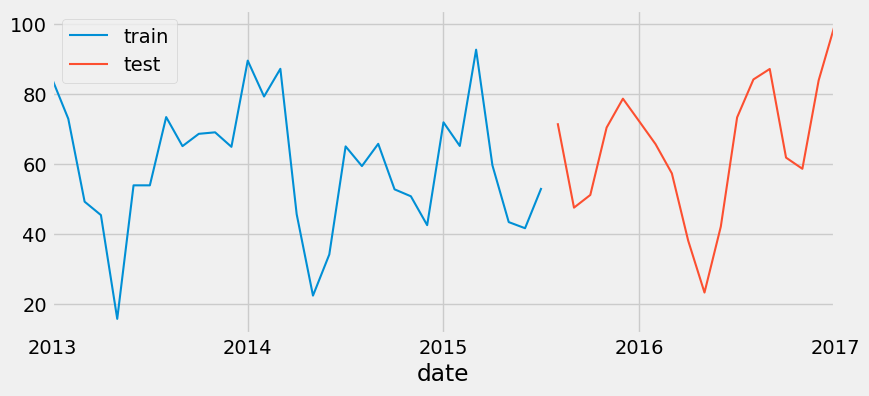

In [97]:
# Divide dados em treinamento e teste
# Para séries temporais, sempre utilizamos os dados mais recentes para teste
steps = 18
data_train = data[:-steps]
data_test  = data[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

# Plotando os dados
fig, ax=plt.subplots(figsize=(9, 4))
data_train['humidity'].plot(ax=ax, label='train')
data_test['humidity'].plot(ax=ax, label='test')
ax.legend();